# 2. PCA: Food Consumption in European Countries

## 2.1

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
import pandas as pd

In [331]:
dat = pd.read_csv("data/food-consumption.csv")

atr = dat.iloc[:,1:21]
country = dat.iloc[:,0]
m,n = atr.shape
atr

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,90,49,88,19,57,51,19,21,27,21,81,75,44,71,22,91,85,74,30,26
1,82,10,60,2,55,41,3,2,4,2,67,71,9,46,80,66,24,94,5,18
2,88,42,63,4,76,53,11,23,11,5,87,84,40,45,88,94,47,36,57,3
3,96,62,98,32,62,67,43,7,14,14,83,89,61,81,15,31,97,13,53,15
4,94,38,48,11,74,37,23,9,13,12,76,76,42,57,29,84,80,83,20,5
5,97,61,86,28,79,73,12,7,26,23,85,94,83,20,91,94,94,84,31,24
6,27,86,99,22,91,55,76,17,20,24,76,68,89,91,11,95,94,57,11,28
7,72,26,77,2,22,34,1,5,20,3,22,51,8,16,89,65,78,92,6,9
8,55,31,61,15,29,33,1,5,15,11,49,42,14,41,51,51,72,28,13,11
9,73,72,85,25,31,69,10,17,19,15,79,70,46,61,64,82,48,61,48,30


In [332]:
mu = np.array(np.mean(atr,axis = 1))
xc = atr - mu[:,None]
print(np.shape(xc))
C = np.dot(xc,xc.T)/m
print(m)
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]


(16, 20)
16


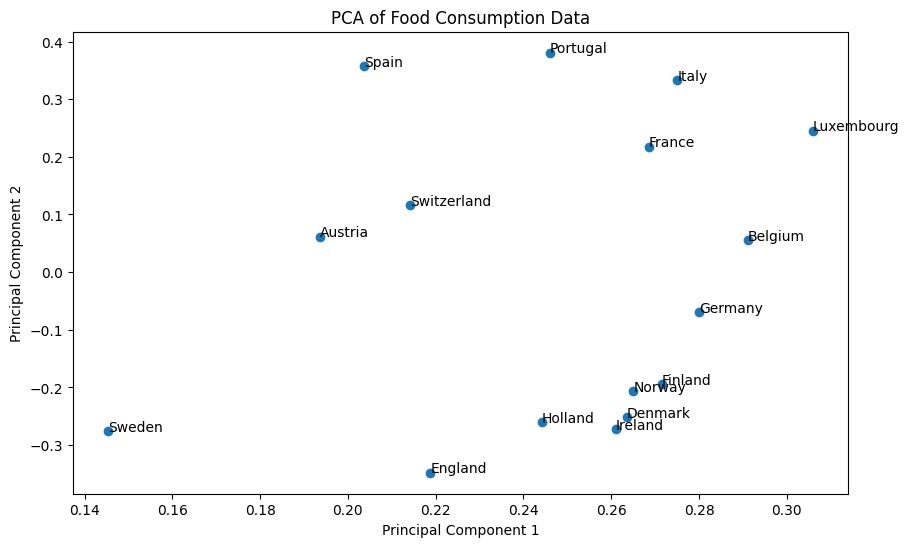

In [333]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(country):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

## 2.2

In [334]:
dat = pd.read_csv("data/food-consumption.csv")
dat = dat.T.reset_index()
country = dat.iloc[1:,1:21]
country = country.astype(float)
dat.columns = dat.iloc[0]
dat = dat[1:]
food = dat.iloc[:,0]
#country = country.to_numpy()
m,n = country.shape
food[1]

'Real coffee'

In [335]:
mu = np.array(np.mean(country,axis = 1))

xc = country - mu[:,None]
xc = np.array(xc, dtype=object)

C = np.dot(xc,xc.T)/m
C = C.astype(float)



In [336]:
K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st S
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue


sorted_indices = np.argsort(S)[::-1]
S = S[sorted_indices]
W = W[:, sorted_indices]

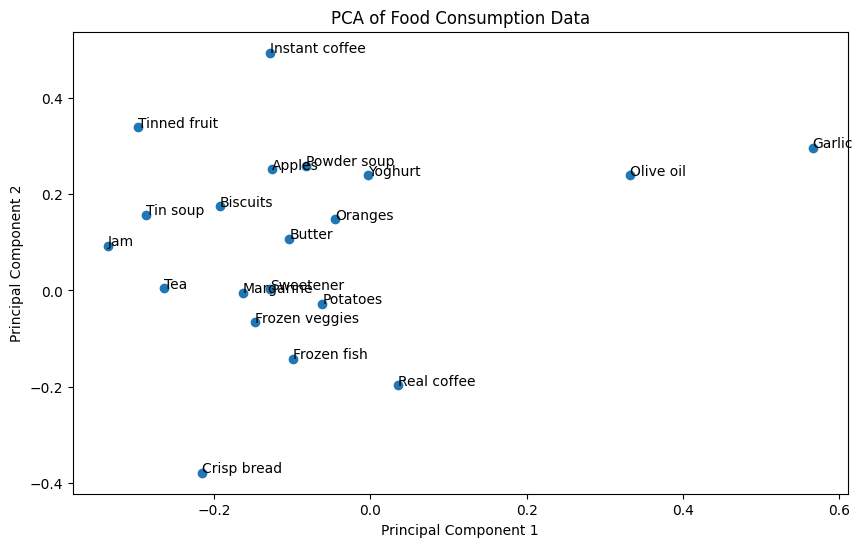

In [337]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(W[:, 0], W[:, 1])

# Label points with country names
for i, country1 in enumerate(food):
    plt.annotate(country1, (W[i, 0], W[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Consumption Data')

# Show the plot
plt.show()

# 3. Order of faces using ISOMAP

In [3]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
data1 = loadmat('data/isomap.mat')
im = data1['images'].reshape(64,64,698).T
data = data1['images']


In [37]:
n = 698
k = 1
eps = 25
d = data
euclidean_distances = np.ones((n, n)) * np.inf
adjacency_matrix = np.zeros((n, n))
di = np.zeros((n, n)) 
for i in range(n):
    for j in range(n):
        dist = np.sqrt(np.sum((d[i] - d[j]) ** 2)) 
        euclidean_distances[i, j] = dist
9
sp = euclidean_distances < eps
di[sp] = euclidean_distances[sp]
for i in range(n):
    # Sort the similarities and get the indices of the k nearest neighbors
    nearest_neighbors_indices = np.argsort(euclidean_distances[i])[:k]

    # Set the corresponding entries in the adjacency matrix to 1
    adjacency_matrix[i, nearest_neighbors_indices] = di[i, nearest_neighbors_indices]

In [39]:
euclidean_distances

array([[0.        , 0.43177229, 0.89743864, ..., 5.84418898, 5.94811834,
        5.91458795],
       [0.43177229, 0.        , 0.52931732, ..., 5.80384796, 5.90708189,
        5.8732185 ],
       [0.89743864, 0.52931732, 0.        , ..., 5.75924044, 5.85894132,
        5.82321274],
       ...,
       [5.84418898, 5.80384796, 5.75924044, ..., 0.        , 0.71764071,
        1.37791858],
       [5.94811834, 5.90708189, 5.85894132, ..., 0.71764071, 0.        ,
        0.72705983],
       [5.91458795, 5.8732185 , 5.82321274, ..., 1.37791858, 0.72705983,
        0.        ]])

In [34]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_dist = pairwise_distances(d)

np.all(pairwise_dist == adjacency_matrix)

C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17092\1181697507.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.all(pairwise_dist == adjacency_matrix)


False

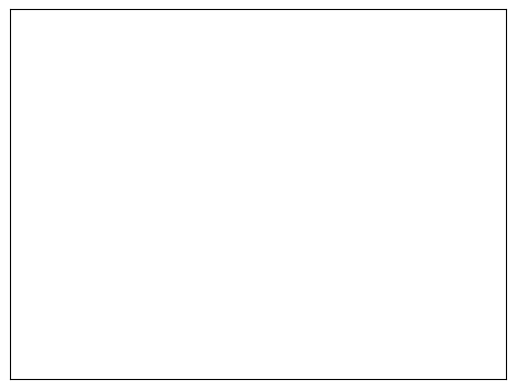

In [35]:
# https://www.askpython.com/python/examples/adjacency-matrix-python 

import networkx as nx
def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  #return vertices,edges
  return


createGraph(adjacency_matrix)

In [414]:
from scipy import linalg
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import shortest_path

eps = 2
d = data
n, m = d.shape
dist = cdist(d.T, d.T, metric='euclidean')
adj =  np.zeros((m, m)) + np.inf
bln = dist < eps 
adj[bln] = dist[bln]
short = shortest_path(pairwise_dist)
short = short.real
short

array([[  0.        , 140.54870615,  27.72831701, ..., 214.75890265,
        203.74187282, 152.39468754],
       [140.54870615,   0.        , 152.63675748, ..., 124.36406912,
        183.72303916, 147.01975316],
       [ 27.72831701, 152.63675748,   0.        , ..., 232.21586531,
        207.43172622, 168.13031924],
       ...,
       [214.75890265, 124.36406912, 232.21586531, ...,   0.        ,
        217.67288687, 135.77162206],
       [203.74187282, 183.72303916, 207.43172622, ..., 217.67288687,
          0.        , 153.56930627],
       [152.39468754, 147.01975316, 168.13031924, ..., 135.77162206,
        153.56930627,   0.        ]])

In [415]:
d = short
dim = 2
n, m = d.shape
h = np.eye(m) - (1/m)*np.ones((m, m))

c = -1/2*h.dot(d**2).dot(h)
evals, evecs = linalg.eig(c)
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:, idx]
evals = evals[:dim] 
evecs = evecs[:, :dim]
z = evecs.dot(np.diag(evals**(-1/2)))
z = z.real

Text(0.5, 0, 'Right-Left Pose')

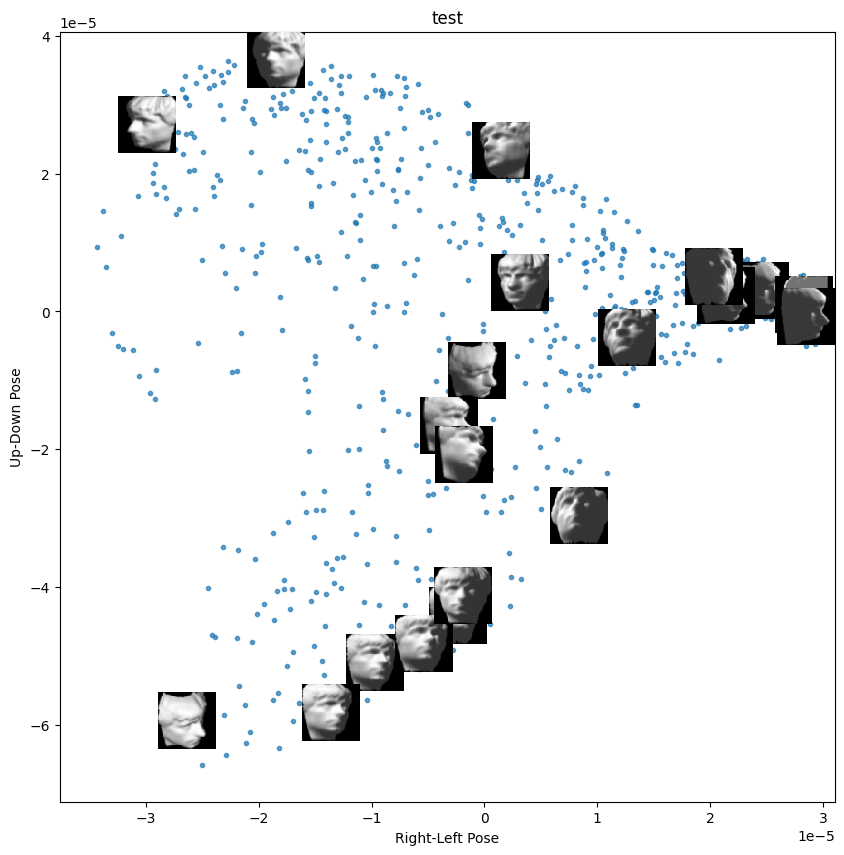

In [416]:
components = z
x = data.T
n, m = x.shape
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('test')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
# Show 40 of the images ont the plot
x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08
for i in range(20):
    img_num = np.random.randint(0, n)
    x0 = components[img_num, 0] - (x_size / 2.)
    y0 = components[img_num, 1] - (y_size / 2.)
    x1 = components[img_num, 0] + (x_size / 2.)
    y1 = components[img_num, 1] + (y_size / 2.)
    img = x[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)
ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

In [350]:
np.shape(data.T)

(698, 4096)

# 4. Eigenfaces and simple face recognition

In [24]:
import glob
from PIL import Image
from scipy import ndimage
from sklearn.decomposition import PCA

# pull images 
images1 = [Image.open(file) for file in glob.glob("data/yalefaces/s1/*.gif")]
images2 = [Image.open(file) for file in glob.glob("data/yalefaces/s2/*.gif")]

# downsampling by factor of 4
im_og = np.empty([10, 243, 320])
s1 = np.empty([10,61,80])
for i in range(len(images1)):
    im_og[i] = np.array(images1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([9, 243, 320])
s2 = np.empty([9,61,80])
for i in range(len(images2)):
    im_og[i] = np.array(images2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
S1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    S1.append(s)
    
S2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    S2.append(s)

S1 =np.squeeze(S1)
S2 =np.squeeze(S2)


C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17092\807143877.py:15: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17092\807143877.py:21: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


In [26]:
from sklearn.decomposition import PCA
# Perform PCA to get top 6 eignfaces
pca1 = PCA(n_components=1)
pca1.fit(S1)
ef1 = pca1.components_
ef1i = ef1.reshape(1,61,80)

pca2 = PCA(n_components=1)
pca2.fit(S2)
ef2 = pca2.components_
ef2i = ef2.reshape(1,61,80)


In [27]:
# pull images 
test1 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject01-test.gif")]
test2 = [Image.open(file) for file in glob.glob("data/yalefaces/test/subject02-test.gif")]

# downsampling by factor of 4
im_og = np.empty([1, 243, 320])
s1 = np.empty([1,61,80])
for i in range(len(test1)):
    im_og[i] = np.array(test1[i])
    s1[i] = ndimage.interpolation.zoom(im_og[i],.25)

im_og = np.empty([1, 243, 320])
s2 = np.empty([1,61,80])
for i in range(len(test2)):
    im_og[i] = np.array(test2[i])
    s2[i] = ndimage.interpolation.zoom(im_og[i],.25)

# convert to data matrix (each row is vectorized image)
t1 = []
for i in range(len(s1)):
    s = s1[i].reshape(-1,4880) 
    t1.append(s)
    
t2 = []
for i in range(len(s2)):
    s = s2[i].reshape(-1,4880) 
    t2.append(s)

t1 = t1[0]
t2 = t2[0]


C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17092\3788355382.py:10: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s1[i] = ndimage.interpolation.zoom(im_og[i],.25)
C:\Users\Patrick Gardocki\AppData\Local\Temp\ipykernel_17092\3788355382.py:16: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  s2[i] = ndimage.interpolation.zoom(im_og[i],.25)


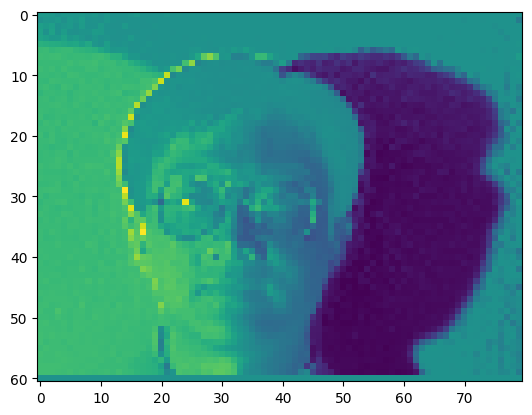

In [28]:
plt.imshow(ef2[0].reshape(61,80))

In [29]:
ef11 = ef1[0].reshape(4880,1)
ef22 = ef2[0].reshape(4880,1)

pr11 = np.linalg.norm(t1 - np.dot(ef1[0].T,np.dot(ef11,t1)))
pr12 = np.linalg.norm(t1 - np.dot(ef2[0].T,np.dot(ef22,t1)))
pr21 = np.linalg.norm(t2 - np.dot(ef1[0].T,np.dot(ef11,t2)))
pr22 = np.linalg.norm(t2 - np.dot(ef2[0].T,np.dot(ef22,t2)))

print("Projection Residual:", pr11)
print("Projection Residual:", pr12)
print("Projection Residual:", pr21)
print("Projection Residual:", pr22)



Projection Residual: 1.941148737662613e-11
Projection Residual: 1.9752747875671955e-11
Projection Residual: 2.20861004392457e-11
Projection Residual: 2.1981682652663675e-11


In [31]:
pr11 = np.linalg.norm(t1 - np.dot(ef1[0].T, ef11).dot(t1))
pr12 = np.linalg.norm(t1 - np.dot(ef2[0].T, ef22).dot(t1))
pr21 = np.linalg.norm(t2 - np.dot(ef1[0].T, ef11).dot(t2))
pr22 = np.linalg.norm(t2 - np.dot(ef2[0].T, ef22).dot(t2))

print("Projection Residual:", pr11)
print("Projection Residual:", pr12)
print("Projection Residual:", pr21)
print("Projection Residual:", pr22)

Projection Residual: 6.2805509579893745e-12
Projection Residual: 6.2805509579893745e-12
Projection Residual: 6.5276193033210805e-12
Projection Residual: 6.5276193033210805e-12
